# Kmean clustering

In [1]:
# handling  data
import  pandas as  pd

In [3]:
#  loading data set
df=pd.read_csv('mallanalysis.csv')

In [4]:
#printing metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# printing top 5 data
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# by manual analysis we have to decide the right column
useful_data=df.iloc[:,[3,4]].values

In [7]:
# now finding no of cluster and anlysing it by ELblow method
import matplotlib.pyplot  as plt
from  sklearn.cluster import KMeans
KMeans()

In [8]:
# analysing KMeans 
#KMeans()
wcss=[]
# lets assume max no of cluster is  10
for i in  range(1,11):
    #  k-means++ algo is being used
    mykm=KMeans(n_clusters=i)
    # now applying this state to data
    mykm.fit(useful_data)
    wcss.append(mykm.inertia_) #  here inertia_ mean -- summary of formula
print(wcss)
    

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30241.34361793659, 25009.79892943139, 22122.192456961642, 19636.753964898147]


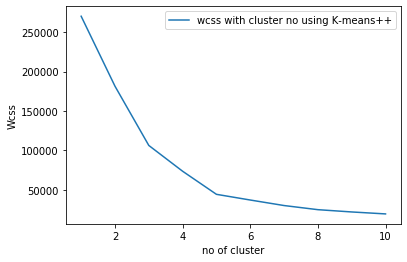

In [9]:
# plotting  graph no of cluster vs wcss
plt.xlabel('no of cluster')
plt.ylabel('Wcss')
plt.plot(range(1,11),wcss,label="wcss with cluster no using K-means++")
plt.legend()
plt.show()

In [10]:
#  now we can assume  no of cluster  as  5
# again calling no of clusters
per_cls=KMeans(n_clusters=5)

In [11]:
#  now  apply  data for clustering
predictcls=per_cls.fit_predict(useful_data)

In [13]:
#predictcls

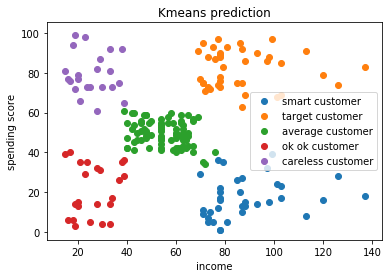

In [17]:
#  now visual output
plt.xlabel('income')
plt.ylabel('spending score')
plt.title('Kmeans prediction')
# for cluster 0 
plt.scatter(useful_data[ predictcls == 0 ,0 ],useful_data[ predictcls == 0 , 1],label='smart customer')
plt.scatter(useful_data[ predictcls == 1 ,0 ],useful_data[ predictcls == 1 , 1],label='target customer')
plt.scatter(useful_data[ predictcls == 2 ,0 ],useful_data[ predictcls == 2 , 1],label='average customer')
plt.scatter(useful_data[ predictcls == 3 ,0 ],useful_data[ predictcls == 3 , 1],label='ok ok customer')
plt.scatter(useful_data[ predictcls == 4 ,0 ],useful_data[ predictcls == 4 , 1],label='careless customer')
plt.legend()
plt.show()